In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [174]:
data =pd.read_csv('admission.csv')

In [175]:

df = data.copy()

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [177]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()

In [180]:
cols= ['GRE Score','TOEFL Score','University Rating','SOP','CGPA']
df[cols] = scaler.fit_transform(df[cols])

In [181]:
df = df.drop(['GRE Score'],axis=1)

<Axes: >

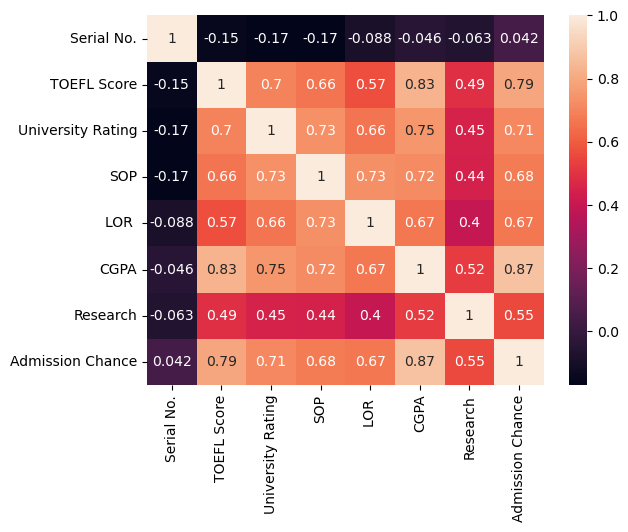

In [182]:
plt.Figure(figsize=(8,6))
sns.heatmap(df.corr(),annot= True)

In [183]:
df.isnull().sum()

Serial No.           0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission Chance     0
dtype: int64

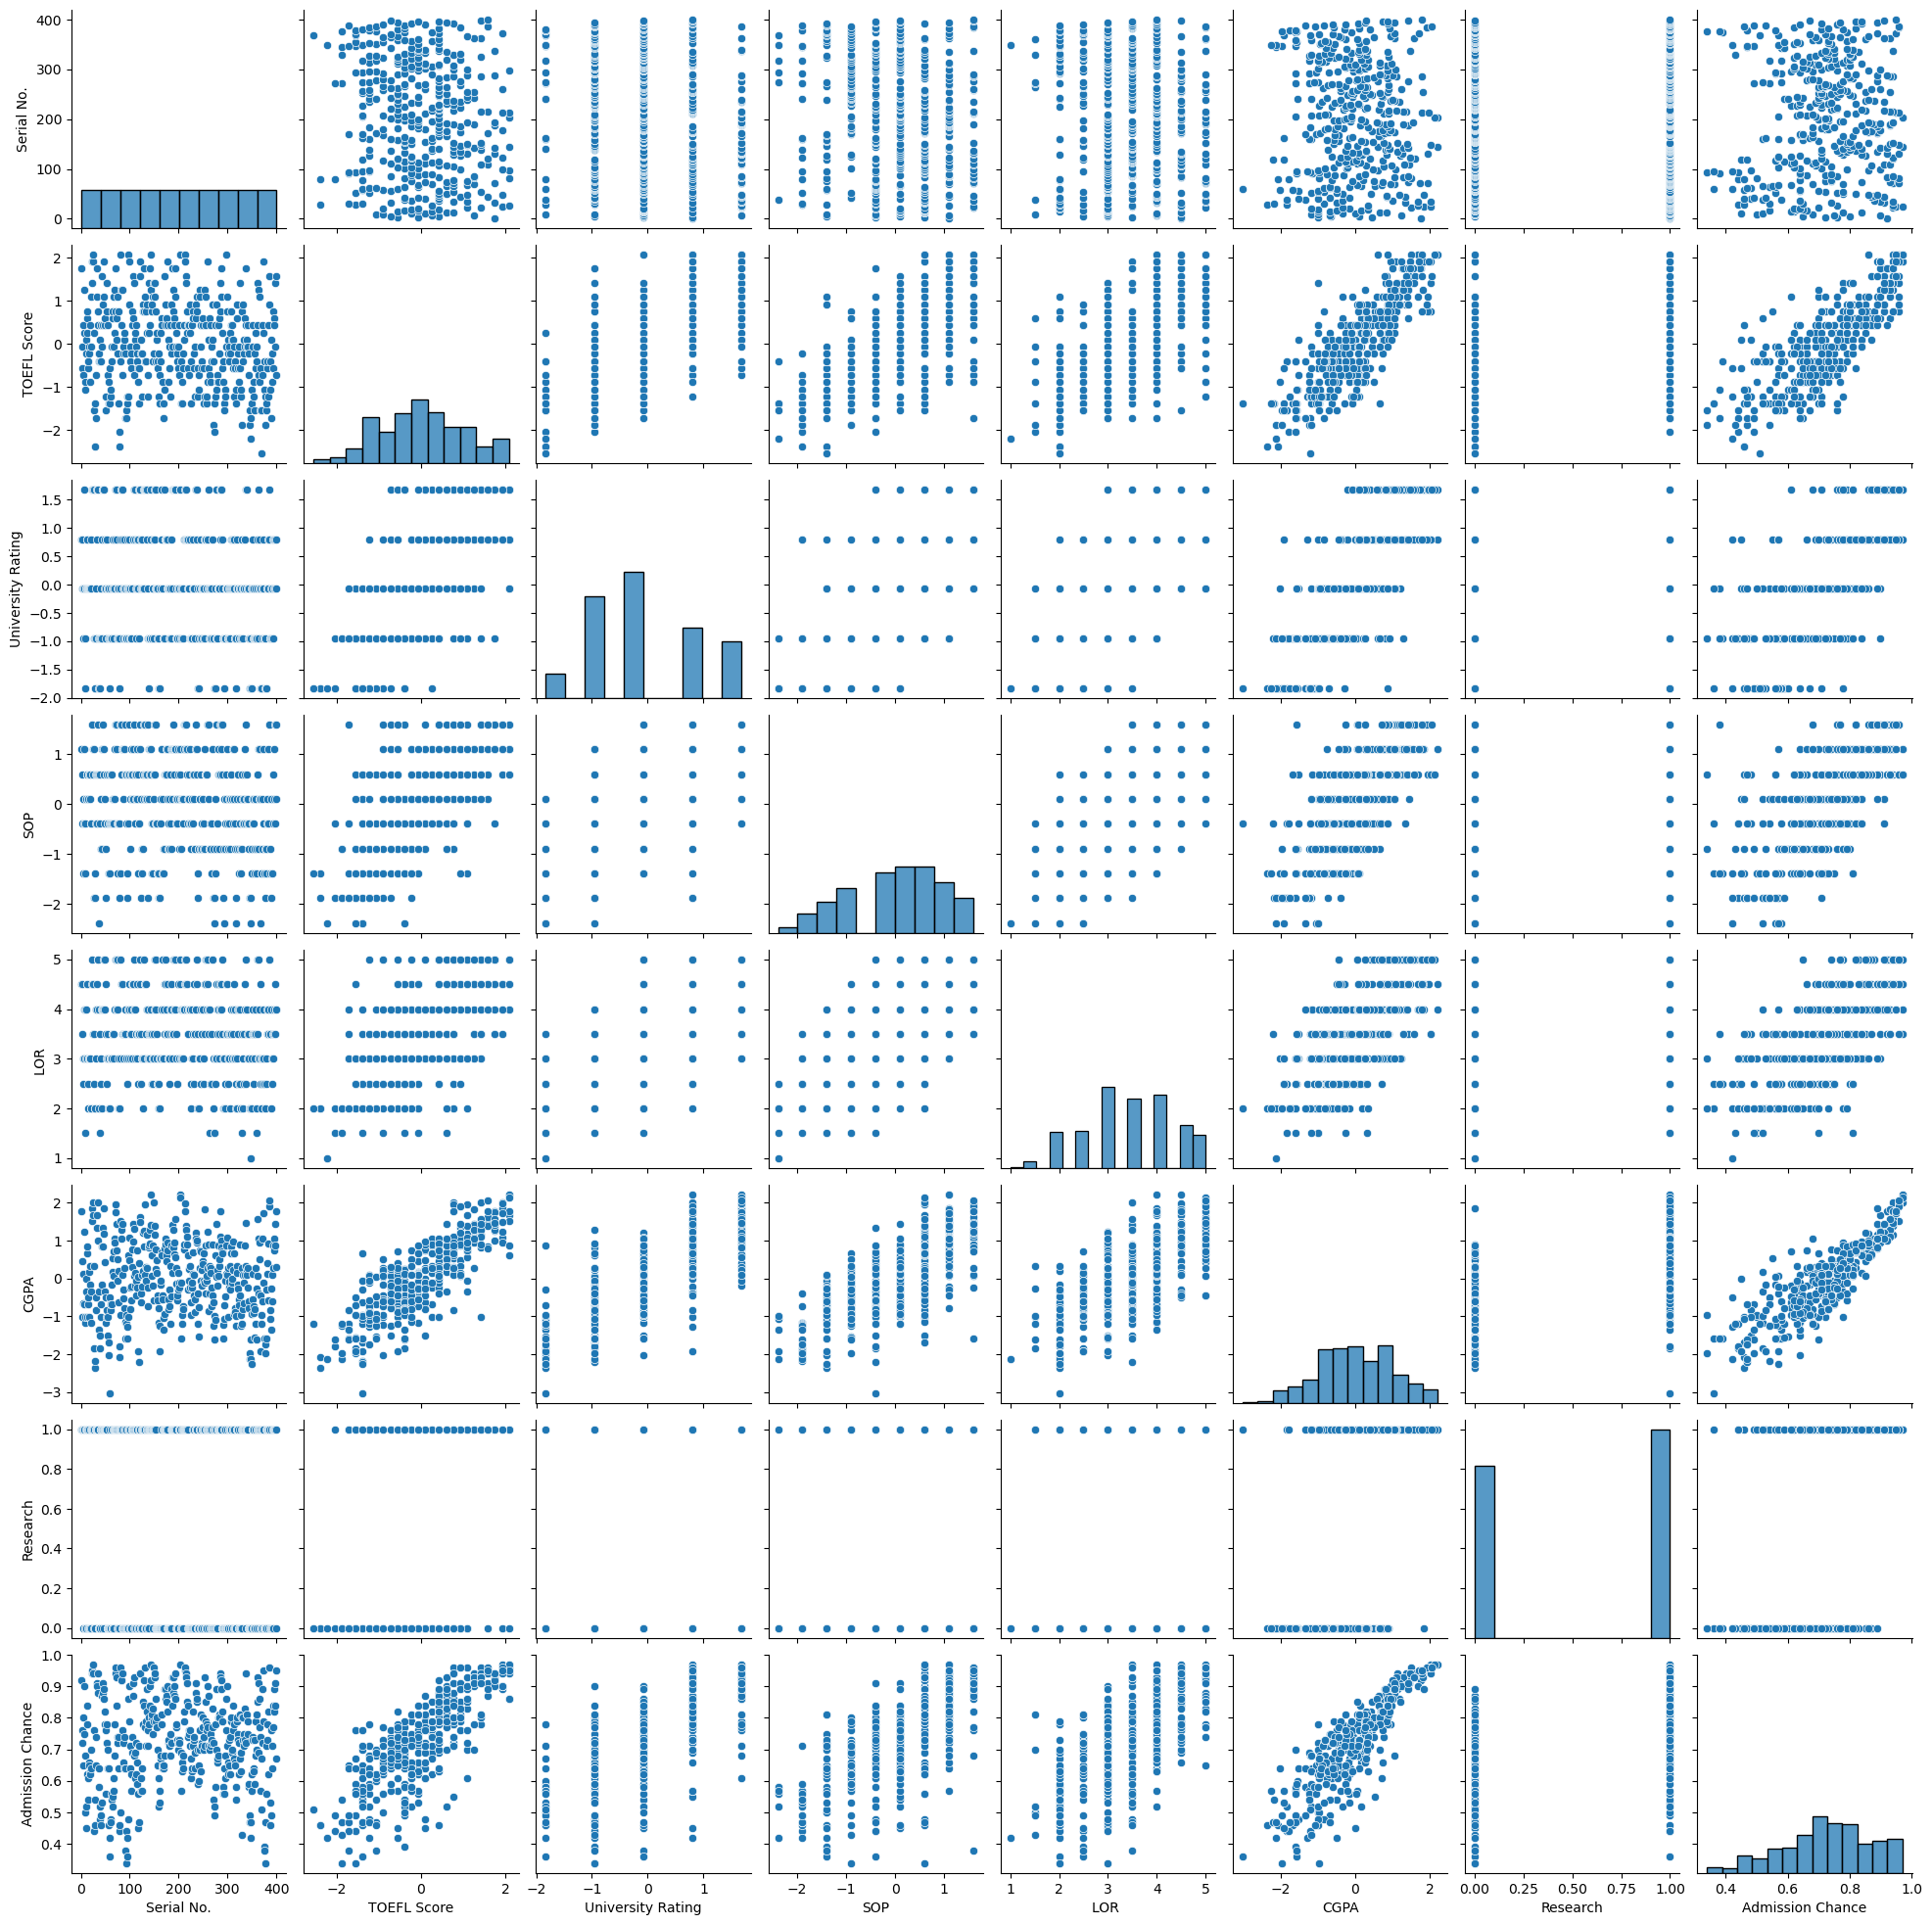

In [184]:
sns.pairplot(df)

In [185]:
df= df.drop(['Serial No.',],axis=1)

In [186]:
x= df.drop(['Admission Chance',],axis=1)
y = df['Admission Chance']

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=44,shuffle=True)

In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
reg = LinearRegression()

In [191]:
reg.fit(x_train,y_train)

LinearRegression()

In [192]:
y_perd = reg.predict(x_test)

In [193]:
from sklearn.metrics import r2_score

In [194]:
print(r2_score(y_test,y_perd))

0.8188866340372427
